In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 20s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

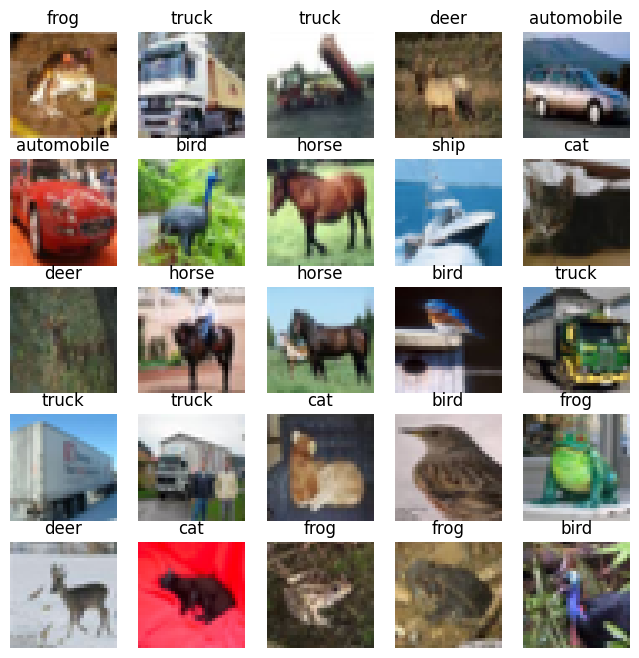

In [ ]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.title(labels[train_labels[i][0]])
  plt.imshow(train_images[i])

In [ ]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [ ]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [ ]:
test_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [ ]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    return image,label

In [ ]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [ ]:
train_ds=(train_ds.map(process_image).shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds.map(process_image).shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

Create AlexNet Architecture

In [ ]:
model=Sequential([
    Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu',
           input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_6 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                      

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(train_ds, epochs=30, validation_data=test_ds)

Epoch 1/30
1562/1562 [==============================] - 26s 9ms/step - loss: 2.1379 - accuracy: 0.2521 - val_loss: 1.5943 - val_accuracy: 0.4335
Epoch 2/30
1562/1562 [==============================] - 20s 10ms/step - loss: 1.7143 - accuracy: 0.3807 - val_loss: 1.4403 - val_accuracy: 0.4815
Epoch 3/30
1562/1562 [==============================] - 18s 9ms/step - loss: 1.5461 - accuracy: 0.4409 - val_loss: 1.3381 - val_accuracy: 0.5246
Epoch 4/30
1562/1562 [==============================] - 19s 10ms/step - loss: 1.4253 - accuracy: 0.4871 - val_loss: 1.2669 - val_accuracy: 0.5525
Epoch 5/30
1562/1562 [==============================] - 18s 9ms/step - loss: 1.3378 - accuracy: 0.5215 - val_loss: 1.2196 - val_accuracy: 0.5626
Epoch 6/30
1562/1562 [==============================] - 21s 10ms/step - loss: 1.2504 - accuracy: 0.5535 - val_loss: 1.1611 - val_accuracy: 0.5890
Epoch 7/30
1562/1562 [==============================] - 17s 9ms/step - loss: 1.1703 - accuracy: 0.5832 - val_loss: 1.0929 - val

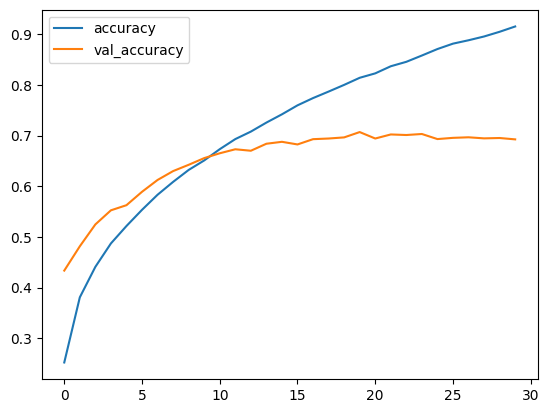

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()